In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd 'drive/My Drive/dataset/image_classification'

/content/drive/My Drive/dataset/image_classification


In [3]:
from keras.preprocessing import image
import numpy as np
import os
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
PATH = os.getcwd()
print(PATH)

/content/drive/My Drive/dataset/image_classification


In [5]:
data_dir_list = os.listdir(PATH)
data_dir_list

['dogs', 'humans', 'horses', 'cats']

In [6]:
img_data_list=[]
for dataset in data_dir_list:
  img_list=os.listdir(PATH+'/'+ dataset)
  print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
  for img in img_list:
    img_path = PATH + '/'+ dataset + '/'+ img
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_data_list.append(x)


Loaded the images of dataset-dogs

Loaded the images of dataset-humans

Loaded the images of dataset-horses

Loaded the images of dataset-cats



In [7]:
img_data = np.array(img_data_list)
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(100, 1, 224, 224, 3)
(1, 100, 224, 224, 3)
(100, 224, 224, 3)


In [8]:
# Define the number of classes
num_classes = 4
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [9]:
labels[0:25]=0
labels[26:50]=1
labels[51:75]=2
labels[76:]=3

In [10]:
names = ['cats','dogs','horses','humans']
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [11]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [12]:
print(X_train.shape)
print(x.shape)

(80, 224, 224, 3)
(100, 224, 224, 3)


**Model : 1**

**Deep Neural Network**

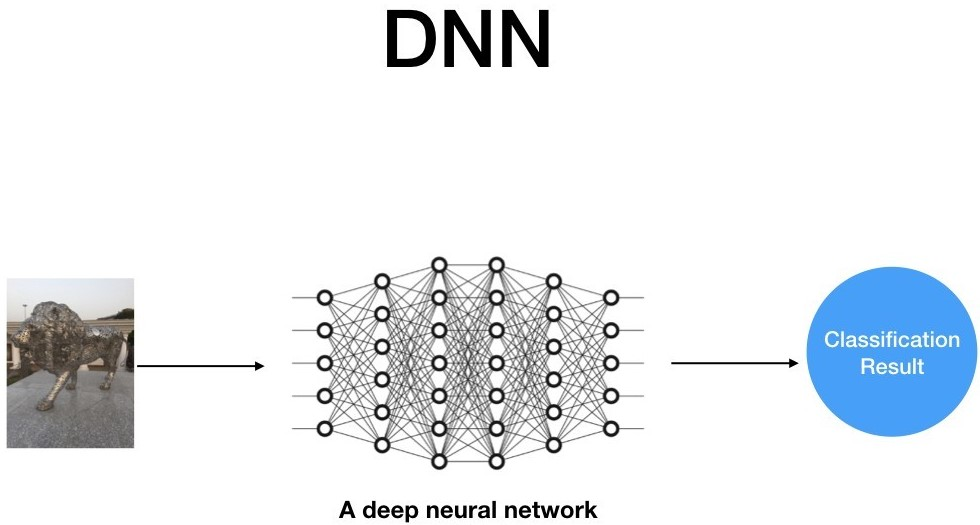



**Training time** : 6.3 hrs,

**loss** : 7.7450 — **accuracy** : 0.4996,

**val_loss** : 7.7479 — **val_accuracy** : 0.5038

The accuracy of the model is bad, we may be able to improve on performance of DNN by adding more layers and experimenting with different optimizer function/regularization function etc.



In [13]:
#Model - 1
#Deep Neural Network (DNN)

from tensorflow.keras.layers import Activation,Flatten,Dense,Dropout
from tensorflow import keras
model = keras.Sequential()
#model.add(Flatten(input_shape = (224,224,3)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('tanh'))

model.compile(optimizer = 'rmsprop',
loss = 'binary_crossentropy',
metrics = ['accuracy'])

**Model : 2**

**Convolution Neural Network (CNN)**

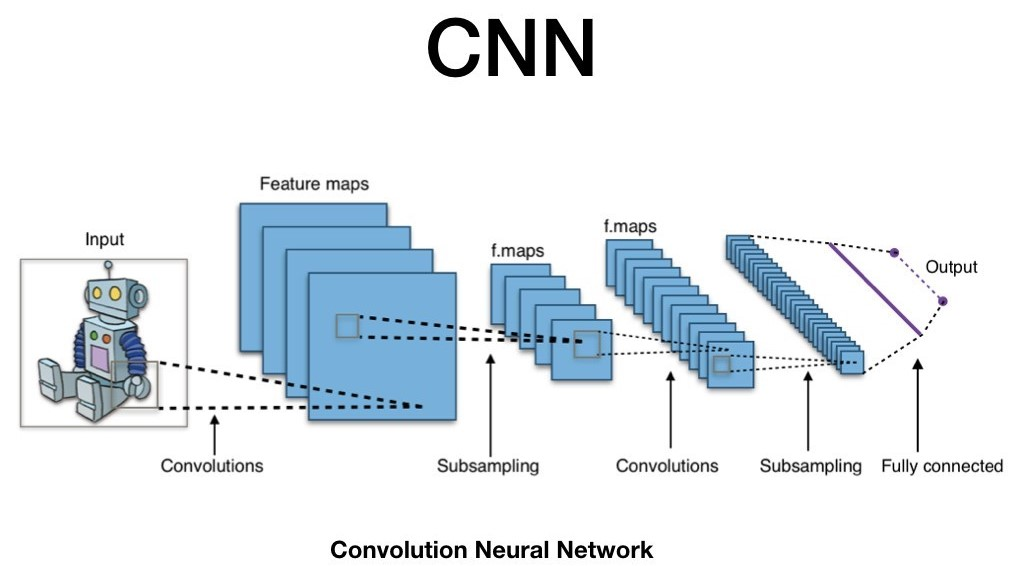


**Training time** : 5.4 hrs,

**loss** : 0.0546

**val_loss** : 3.2969 

As the results suggest, CNN works much better when dealing with images. We have reduced training time by almost 1 hr. Training loss is very optimized but validation loss is still a bit higher which indicates over-fitting. We can further regularize our model to reduce over-fitting or we can use any of the method suggested in DNN section to improve our model performance.



In [14]:
#Model - 2
#Convolution Neural Network

from tensorflow.keras.layers import Conv2D,MaxPooling2D
model = keras.Sequential()


model.add(Conv2D(32,(3,3), input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'rmsprop',
loss = 'binary_crossentropy',
metrics = ['accuracy'])

**Model : 3**

**Transfer Learning**

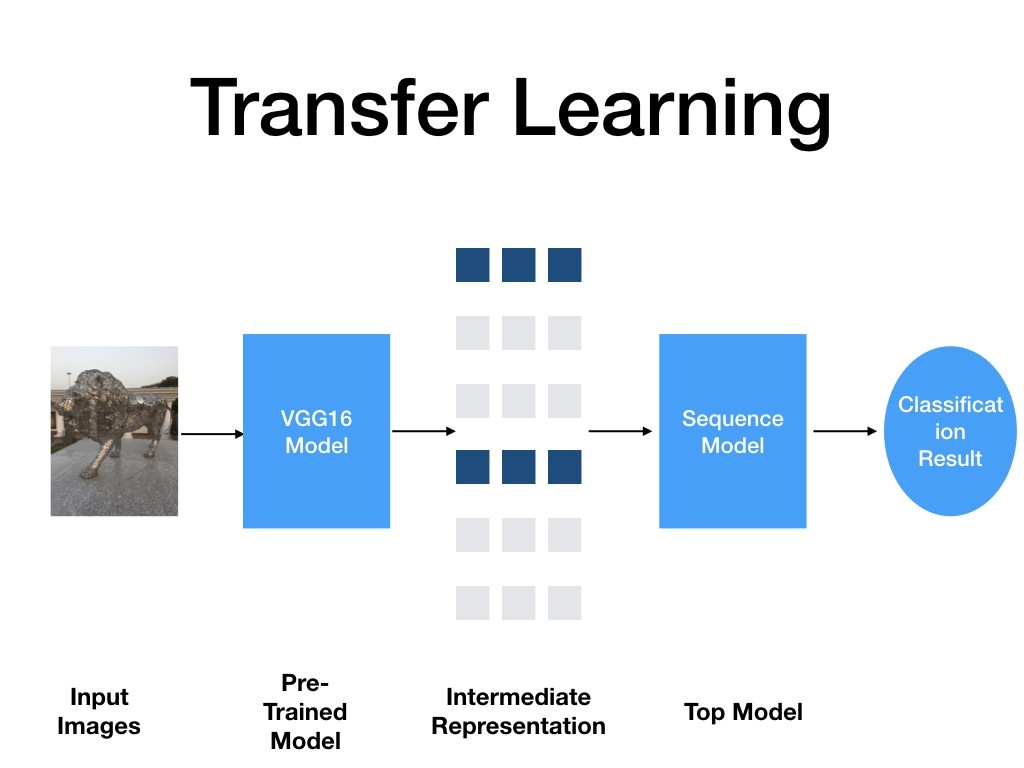

**Training time** : 12 mins [10 mins to get representations + 2 mins to train top model],

**loss** : 0.1985  — **accuracy** : 0.9219 ,

**val_loss** : 0.6466  — **val_accuracy** : 0.8045

So, using transfer learning we could train a model which have training accuracy of 92% in only 12 mins which is much better when compared to earlier discussed models.



In [15]:
#Model - 3
#Transfer Learning (TL)

model = keras.applications.VGG16(include_top = False, weights = 'imagenet')
model = keras.Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
loss = 'binary_crossentropy',
metrics = ['accuracy'])

58892288/58889256 [==============================] - 1s 0us/step
